some packages to be imported first

In [9]:
import numpy as np
import matplotlib.pyplot as plt

define some constant in cgs units

In [10]:
G = 6.672e-8 # Gravitational constant in cgs units
M_solar=1.989e33 # Solar mass in g
m_e = 9.109534e-28 # electron mass in g
m_p = 1.6726231e-24 # proton mass in g
mu=2 # the number of protons or neutrons per electron
m = mu*m_p+m_e # mass of the atom in g
h_bar = 1.0545997e-27 # Planck's constant in erg s
c = 2.99792458e10 # cm/s
lambda_e= h_bar/ (m_e*c) # electron rest wavelength in cm 

a map from x to phi

In [11]:
def phi(x)->float:
    return (x*np.sqrt(1+x**2)*((2/3)*(x**2)-1)+np.log(x+np.sqrt(1+x**2)))/(8*np.pi**2)

define the equation of state function  EoS: P_e = EoS(rho)

In [12]:
def EoS(rho)->float:
    n=rho/m # number density of electrons in cm^-3
    x = np.power(3*(np.pi**2)*n,1/3)*lambda_e # dimensionless parameter
    P_e = m_e*(c**2)*phi(x)/lambda_e**3 #pressure of zero temperature electrons in erg/cm^3
    return P_e
    #return 1/4*np.power(3*np.pi**2*rho/m,1/3)*rho/m*h_bar*c


plot to check if correct, compare it with the extreme relativity scenario(orange).

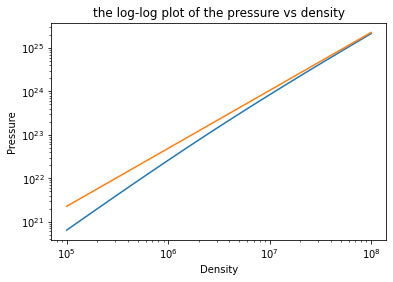

In [13]:
rho_test=np.logspace(5,8,100)
P_test=EoS(rho_test)
plt.loglog(rho_test,P_test)
plt.loglog(rho_test,1/4*np.power(3*np.pi**2*rho_test/m,1/3)*rho_test/m*h_bar*c)
plt.title('the log-log plot of the pressure vs density')
plt.xlabel("Density")
plt.ylabel('Pressure')
plt.show()

a simple binary search code, the accuracy depends on the abortion criteria

In [25]:
def inv_B(P)->float:
    rho_l=-1e14
    rho_r=1e14
    while(rho_r-rho_l>1e-1):
        rho_m=(rho_l+rho_r)/2
        if(EoS(rho_m)>P):
            rho_r=rho_m
        else:
            rho_l=rho_m
    return rho_m

MCrun serves as a function to solve for one specific input: rho_c

In [22]:
def MRrun(rho_c):
    #rho_c = 1e8 # central density in g/cm^3
    step_r = 1e5 # step size in cm
    P_c = EoS(rho_c) # central pressure in erg/cm^3
        #solution arrays
    rho_sol = np.array([rho_c]) # density solution

    r_start = step_r*0 # starting radius in cm
    r_sol = np.array([r_start]) # radius solution

    P_sol = np.array([P_c]) # pressure solution
    i=0 
    Mass_acc = 4/3*np.pi*r_start**3*rho_c #mass accumulated in g
        #loop

    while( rho_sol[i]>0 ): # stop when density is negative
        r_sol = np.append( r_sol , r_sol[i]+step_r ) # append the next radius
        Mass_acc += rho_sol[i] * 4*np.pi*(r_sol[i]**2) * step_r # accumulate mass
        P_sol = np.append( P_sol , P_sol[i] - G*rho_sol[i]*Mass_acc/(r_sol[i+1]**2)*step_r ) # append the next pressure
        i+=1
        rho_sol = np.append( rho_sol , inv_B(P_sol[i]) ) # append the next density

        #print(rho_sol[i],P_sol[i],r_sol[i]/1e5,Mass_acc/M_solar) # print the current density, pressure and radius
    return (Mass_acc/M_solar,r_sol[i]/1e5) # return the mass and radius in solar mass and km

test if the function works

In [16]:
rho_c = 1e8 # central density in g/cm^3
mass,radius = MRrun( rho_c ) # run the code
print(mass,radius) # print the mass and radius

1.1621536017807814 4295.0


/var/folders/9r/d810_63d7yx101gkrv_41ygm0000gn/T/ipykernel_86356/3558340524.py:3: RuntimeWarning: invalid value encountered in power
  x = np.power(3*(np.pi**2)*n,1/3)*lambda_e # dimensionless parameter


simulate each rho_c, ranging from 1e5 to 1e14, running 100 samples.

/var/folders/9r/d810_63d7yx101gkrv_41ygm0000gn/T/ipykernel_86356/3558340524.py:3: RuntimeWarning: invalid value encountered in power
  x = np.power(3*(np.pi**2)*n,1/3)*lambda_e # dimensionless parameter


10000000000000.0 140.0 1.4181710982983249
12915496650148.826 128.0 1.4166912062571464
16681005372000.557 117.0 1.4150602636071292
21544346900318.867 107.0 1.4132644997465487
27825594022071.258 97.0 1.4112891636714269
35938136638046.26 88.0 1.4091160346902585
46415888336127.73 80.0 1.4067265928197599
59948425031894.21 73.0 1.4040995277655632
77426368268112.78 66.0 1.401208335405132
100000000000000.0 60.0 1.3980281739205571


IndexError: index 10 is out of bounds for axis 0 with size 10

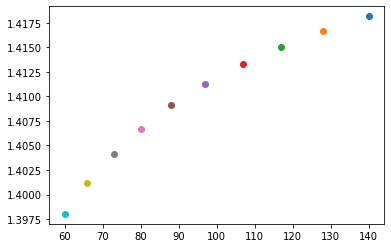

In [26]:
rho_c_test=np.logspace(5,14,10) # central density in g/cm^3
for j in range(0,100):
    M_test,R_test=MRrun(rho_c_test[j]) 
    print(rho_c_test[j],R_test,M_test) 
    plt.scatter(R_test,M_test)
plt.ylabel('M/M_solar')
plt.xlabel('R(km)')
plt.xlim(0,17000)
plt.ylim(0,1.5)
plt.title('the Mass-Radius relation')
plt.savefig('ChandrasekharLimit.jpg',dpi=400)
plt.show()